# Image Classification with CNN using Keras

# Task 1: Import Libraries

In [1]:
import tensorflow as tf
import os
import numpy as np

from matplotlib import pyplot as plt
%matplotlib inline

if not os.path.isdir('models'):
    os.mkdir('models')
    
print('TensorFlow version:', tf.__version__)
print('Is using GPU?', tf.test.is_gpu_available())

TensorFlow version: 2.0.1
Is using GPU? False


# Task 2: Preprocess Data

In [2]:
def get_three_classes(x, y):
    indices_0, _ = np.where(y == 0.)
    indices_1, _ = np.where(y == 1.)
    indices_2, _ = np.where(y == 2.)

    indices = np.concatenate([indices_0, indices_1, indices_2], axis=0)
    
    x = x[indices]
    y = y[indices]
    
    count = x.shape[0]
    indices = np.random.choice(range(count), count, replace=False)
    
    x = x[indices]
    y = y[indices]
    
    y = tf.keras.utils.to_categorical(y)
    
    return x, y

In [4]:
(x_train,y_train),(x_test,y_test)=tf.keras.datasets.cifar10.load_data()
x_train, y_train = get_three_classes(x_train,y_train)
x_test, y_test = get_three_classes(x_test,y_test)

print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(15000, 32, 32, 3) (15000, 3)
(3000, 32, 32, 3) (3000, 3)


# Task 3: Visualize Examples

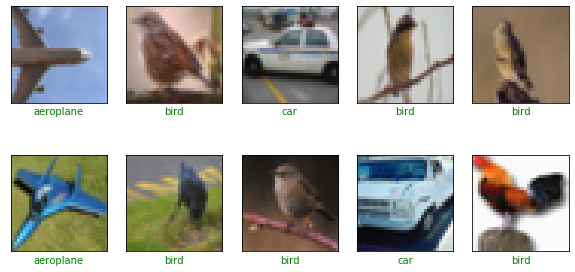

In [6]:
class_names = ['aeroplane', 'car', 'bird']

def show_random_examples(x,y,p):
    indices=np.random.choice(range(x.shape[0]),10,replace=False)
    
    x=x[indices]
    y=y[indices]
    p=p[indices]
    
    plt.figure(figsize=(10,5))
    for i in range(10):
        plt.subplot(2,5,1+i)
        plt.imshow(x[i])
        plt.xticks([])
        plt.yticks([])
        
        col='green' if np.argmax(y[i])==np.argmax(p[i]) else 'red'
        plt.xlabel(class_names[np.argmax(p[i])],color=col)
        
    plt.show()
    
show_random_examples(x_train,y_train,y_train)

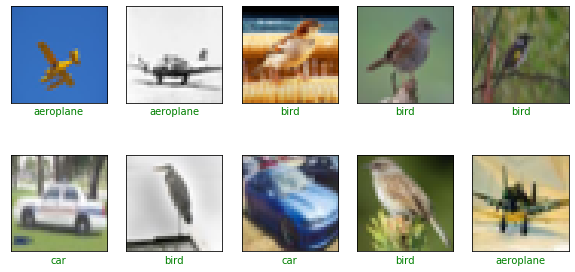

In [7]:

show_random_examples(x_test,y_test,y_test)



# Task 4: Create Model

In [11]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.layers import Dropout, Flatten, Input, Dense



def create_model():
    def add_conv_block(model,num_filters):
        model.add(Conv2D(num_filters,3,activation='relu',padding='same'))
        model.add(BatchNormalization())
        model.add(Conv2D(num_filters,3,activation='relu'))
        model.add(MaxPooling2D(pool_size=2))
        model.add(Dropout(0.5))
        
        return model
    
    model=tf.keras.models.Sequential()
    model.add(Input(shape=(32,32,3)))
    
    model=add_conv_block(model,32)
    model=add_conv_block(model,64)
    model=add_conv_block(model,128)
    
    model.add(Flatten())
    model.add(Dense(3,activation='softmax'))
    
    model.compile(
        loss='categorical_crossentropy',
        optimizer='adam',metrics=['accuracy']
        
    )
    return model


model=create_model()
model.summary()
    
    





Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 64)        18496     
_________________________________________________________________
batch_normalization_1 (Batch (None, 15, 15, 64)       

# Task 5: Train the Model

In [14]:
history=model.fit(
    x_train/255., y_train,
    validation_data=(x_test/255.,y_test),
    epochs=10,batch_size=128,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(monitor='val_accuracy',patience=3),
        tf.keras.callbacks.ModelCheckpoint('models/model_{val_accuracy:.3f}.h5',
        save_best_only=True,save_weights_only=False,
        monitor='val_accuracy')
                                           
    ]
)

Train on 15000 samples, validate on 3000 samples
Epoch 1/10
15000/15000 [==============================] - 128s 9ms/sample - loss: 0.8723 - accuracy: 0.6829 - val_loss: 2.2477 - val_accuracy: 0.3333
Epoch 2/10
15000/15000 [==============================] - 119s 8ms/sample - loss: 0.5640 - accuracy: 0.7747 - val_loss: 2.5149 - val_accuracy: 0.3337
Epoch 3/10
15000/15000 [==============================] - 120s 8ms/sample - loss: 0.4944 - accuracy: 0.8018 - val_loss: 2.0201 - val_accuracy: 0.5383
Epoch 4/10
15000/15000 [==============================] - 121s 8ms/sample - loss: 0.4448 - accuracy: 0.8239 - val_loss: 0.9877 - val_accuracy: 0.6127
Epoch 5/10
15000/15000 [==============================] - 123s 8ms/sample - loss: 0.4072 - accuracy: 0.8405 - val_loss: 0.4438 - val_accuracy: 0.8237
Epoch 6/10
15000/15000 [==============================] - 120s 8ms/sample - loss: 0.3665 - accuracy: 0.8576 - val_loss: 0.3906 - val_accuracy: 0.8557
Epoch 7/10
15000/15000 [===========================

# Task 6: Final Predictions

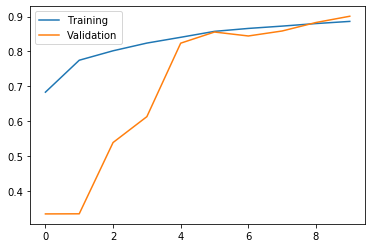

In [15]:
accs=history.history['accuracy']
val_accs=history.history['val_accuracy']

plt.plot(range(10), accs,label='Training')
plt.plot(range(10), val_accs,label='Validation')

plt.legend()
plt.show()

In [16]:
model = tf.keras.models.load_model('models/model_0.901.h5')

In [18]:
preds=model.predict(x_test/255.)

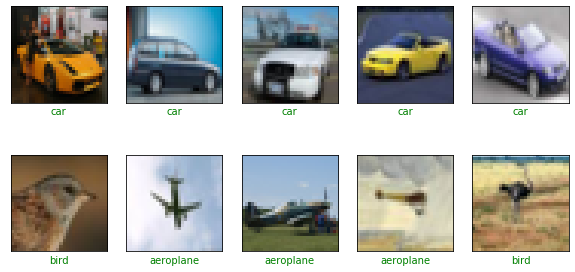

In [21]:
show_random_examples(x_test,y_test,preds)